<a href="https://colab.research.google.com/github/Aaron-David-HdM/Applied-Data-Analytics/blob/main/UseCase_3/Durchfuehrung%20der%20Klassifikationsanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Git-Repository klonen sowie pullen**

In [1]:
!git clone https://github.com/Aaron-David-HdM/Applied-Data-Analytics.git

Cloning into 'Applied-Data-Analytics'...
remote: Enumerating objects: 470, done.
remote: Counting objects: 100% (311/311), done.
remote: Compressing objects: 100% (297/297), done.
remote: Total 470 (delta 129), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (470/470), 3.04 MiB | 10.52 MiB/s, done.
Resolving deltas: 100% (186/186), done.


**Zu dem UseCase_3-Pfad wechseln**

In [2]:
%cd /content/Applied-Data-Analytics/UseCase_3

/content/Applied-Data-Analytics/UseCase_3


**Importieren von benötigten Bibliotheken sowie Lesen der CSV-Datei**

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

filepath = 'Einkommen_und_Verkaeufe.csv' # Bereinigte Daten für UseCase_3
df = pd.read_csv(filepath, decimal='.')

**Nicht benötigte 'Unnamed'-Spalte entfernt**

In [82]:
df.drop(columns= ['Unnamed: 0'], inplace = True)

**Die Werteverteilung der abhängigen Variable ausgeben**

In [83]:
df['Purchased'].value_counts()

0    711
1    289
Name: Purchased, dtype: int64

**Daten für Scikit learn vorbereiten**

In [84]:
X = df.drop(columns=['Purchased'])
y = df.Purchased

**Trainings- und Testdatensätze erstellen**

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1834)

**Erstellen eines neuen Trainingsdatensatzes für die Datenexploration**

In [86]:
train_dataset = pd.DataFrame(X_train).copy()
train_dataset['Purchased'] = pd.DataFrame(y_train)

train_dataset

,MonthlyIncome,Male,Age,Purchased
369,6082,1,29,0
239,927,1,29,0
269,644,0,34,1
360,4337,0,24,0
308,532,1,31,0
...,...,...,...,...
449,2149,0,30,0
962,7866,1,29,0
819,1440,0,29,0
821,2394,0,18,0


In [87]:
train_dataset['Purchased'].value_counts()
# 69 %
# 72 %

0    493
1    207
Name: Purchased, dtype: int64

**Explorative Datenanalyse**

In [88]:
train_dataset.groupby(by=['Purchased']).describe().T

Purchased                       0             1
MonthlyIncome count    493.000000    207.000000
              mean    3187.304260   6496.328502
              std     2464.604721   4607.734815
              min      107.000000    482.000000
              25%     1193.000000   2998.000000
              50%     2442.000000   5412.000000
              75%     4694.000000   8703.000000
              max    10426.000000  20450.000000
Male          count    493.000000    207.000000
              mean       0.480730      0.454106
              std        0.500136      0.499096
              min        0.000000      0.000000
              25%        0.000000      0.000000
              50%        0.000000      0.000000
              75%        1.000000      1.000000
              max        1.000000      1.000000
Age           count    493.000000    207.000000
              mean      25.756592     30.028986
              std        5.023682      3.847724
              min       18.000000     23.000000
              25%       21.000000     27.000000
              50%       26.000000     31.000000
              75%       30.000000     34.000000
              max       34.000000     34.000000

Käufer sind durchschnittlich 30 Jahre alt und verdienen monatlich etwa 3309€ mehr als Nicht-Käufer. 

**Pairplot um die Zusammenhänge zwischen den einzelnen Features zu untersuchen**

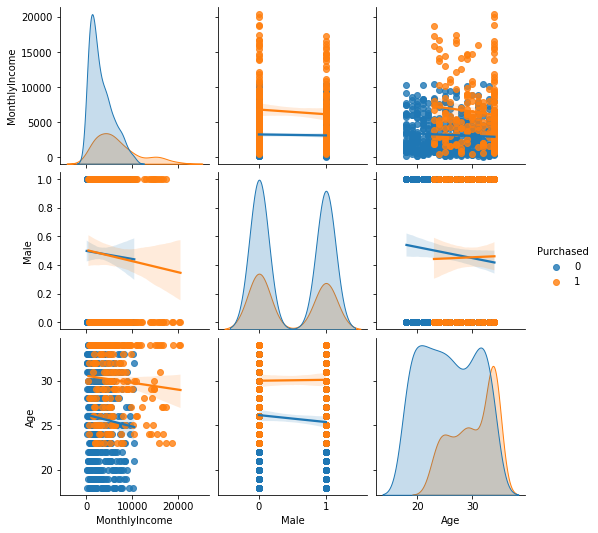

In [89]:
sns.pairplot(hue='Purchased', kind="reg", diag_kind="kde", data=train_dataset);

**Berechnung der Korrelationskoeffizienten nach Pearson**

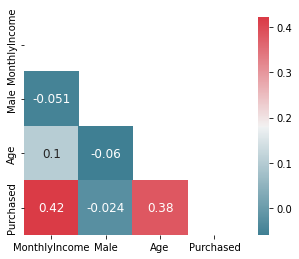

In [90]:
corr = train_dataset.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, annot_kws={"size": 12});

**Erstellen eines KDE-Plots zur Visualisierung des Zusammenhangs zwischen dem  Alter und ob es sich um Käufer oder Nicht-Käufer handelt.**

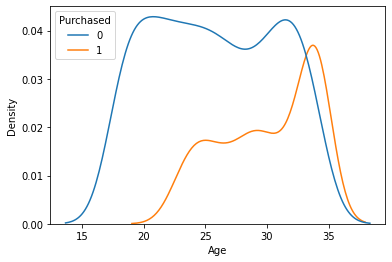

In [91]:
sns.kdeplot(hue="Purchased", x='Age', data=train_dataset);

Die Käufer sind durchschnittlich älter als die Nicht-Käufer.

**Erstellen eines Boxplots zur Visualisierung des Zusammenhangs zwischen dem  Alter, dem Geschlecht und ob es sich um Käufer oder Nicht-Käufer handelt.**

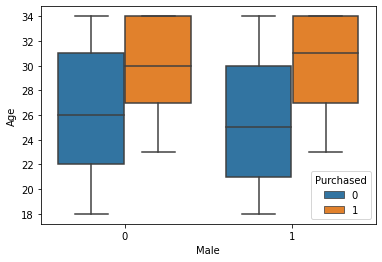

In [92]:
sns.boxplot(x="Male", y="Age", hue="Purchased", data=train_dataset);

Männliche Käufer sind durchschnittlich älter als weibliche, dafür sind männliche Nicht-Käufer im Durchschnitt jünger als weibliche Nicht-Käufer.

Während das Alter der Käufer bei 23 Jahren beginnt, verteilen sich die Nicht-Käufer auf die volle Zielgruppenspanne von 18-34 Jahren.

**Erstellen eines KDE-Plots zur Visualisierung des Zusammenhangs zwischen dem monatlichen Einkommen und ob es sich um Käufer oder Nicht-Käufer handelt.**

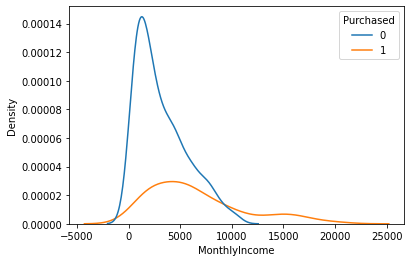

In [93]:
sns.kdeplot(hue="Purchased", x='MonthlyIncome', data=train_dataset); 

Das monatliche Einkommen der Käufer ist durchschnittlich höher, als das der Nicht-Käufer und erstreckt sich über eine weitere Einkommensspanne. Die Nicht-Käufer dagegen weisen bei etwa 3200€ eine sehr hohe Dichte auf.

Das höchste Einkommen der Käufer liegt bei etwas mehr als 20000€ wohingegen das höchste Einkommen der Nicht-Käufer bei etwa 10000€ liegt.

**Erstellen eines Boxplots zur Visualisierung des Zusammenhangs zwischen dem Einkommen, dem Geschlecht und ob es sich um Käufer oder Nicht-Käufer handelt.**

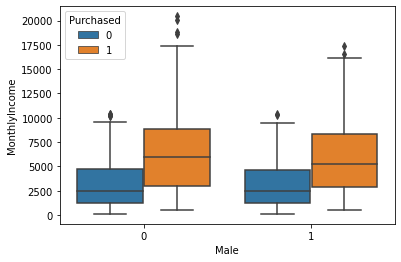

In [94]:
sns.boxplot(x="Male", y="MonthlyIncome", hue="Purchased", data=train_dataset);

Beim Gehalt der Käufer gibt es mehr Ausreißer nach oben. Zusätzlich haben die weiblichen Käufer ein durchschnittlich höheres Einkommen als die männlichen Käufer. Bei den Nicht-Käufern gibt es außerdem keinen großen Unterschied zwischen den zwei Geschlechtern.

# Model (Logistic Regression-Algorithmus)



Wir beschränken uns auf das Alter und das monatliche Einkommen, da nur diese beiden Features relevant für unser Model sind.

In [95]:
features_model = ['Age','MonthlyIncome'] 

X_train = X_train[features_model] 
X_test = X_test[features_model]

In [97]:
# model
clf = skl_lm.LogisticRegressionCV(penalty='l2')
# prediction
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [98]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.7766666666666666

**Klassifikationsmetriken**

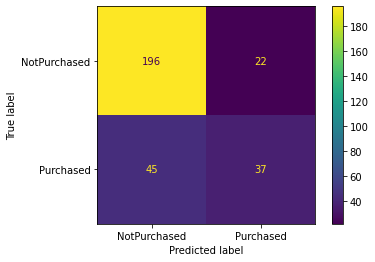

In [99]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NotPurchased', 'Purchased'])
disp.plot()
plt.show()

In [100]:
print(classification_report(y_test, y_pred, target_names=['NotPurchased', 'Purchased']))

              precision    recall  f1-score   support

NotPurchased       0.81      0.90      0.85       218
   Purchased       0.63      0.45      0.52        82

    accuracy                           0.78       300
   macro avg       0.72      0.68      0.69       300
weighted avg       0.76      0.78      0.76       300



Nicht-Käufer(negativ) als Käufer nicht so schlimm, weil er sowieso nichts gekauft hätte.

Käufer(positiv) als Nicht-Käufer schlecht, weil wir möglicherweise einen Käufer verlieren.



**Threshold 0.4**

In [103]:
pred_proba = clf.predict_proba(X_test)

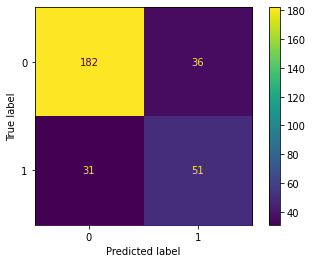

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       218
           1       0.59      0.62      0.60        82

    accuracy                           0.78       300
   macro avg       0.72      0.73      0.72       300
weighted avg       0.78      0.78      0.78       300



In [104]:
df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .4})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, df_['y_pred']))

**Threshold 0.6**

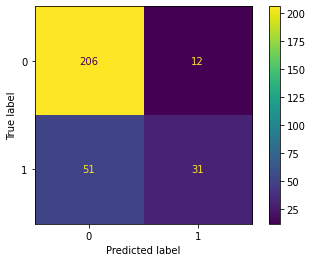

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       218
           1       0.72      0.38      0.50        82

    accuracy                           0.79       300
   macro avg       0.76      0.66      0.68       300
weighted avg       0.78      0.79      0.77       300



In [105]:
df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .6})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, df_['y_pred']))

**Threshold 0.7**

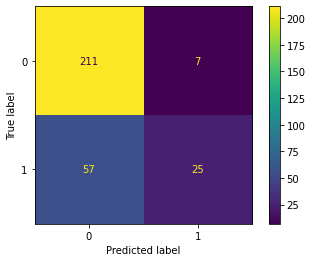

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       218
           1       0.78      0.30      0.44        82

    accuracy                           0.79       300
   macro avg       0.78      0.64      0.65       300
weighted avg       0.79      0.79      0.75       300



In [106]:
df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .7})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, df_['y_pred']))

**Threshold 0.8**

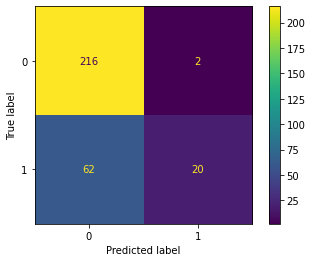

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       218
           1       0.91      0.24      0.38        82

    accuracy                           0.79       300
   macro avg       0.84      0.62      0.63       300
weighted avg       0.81      0.79      0.74       300



In [107]:
df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .8})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, df_['y_pred']))